In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix


In [100]:
data=pd.read_csv("/Users/omgajipara/Desktop/Data Science/AI:ML/Machine Learning/Supervised Learning/Classification/LogisticRegression/Two Class/MultipleInput/LogisticeRegressionMultiple.csv")

In [101]:
data = data.drop('Unnamed: 0', axis=1)
print(data)


    cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]


In [102]:
print(data.isnull().sum())

cgpa         0
iq           0
placement    0
dtype: int64


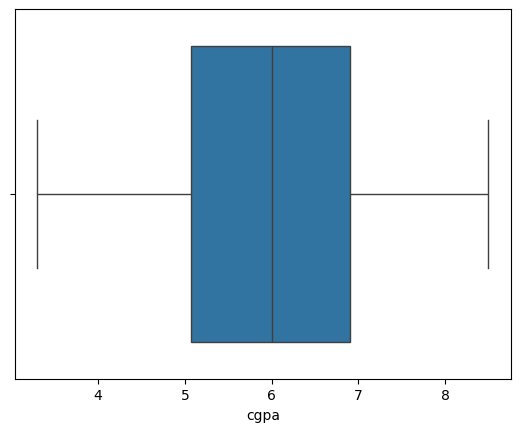

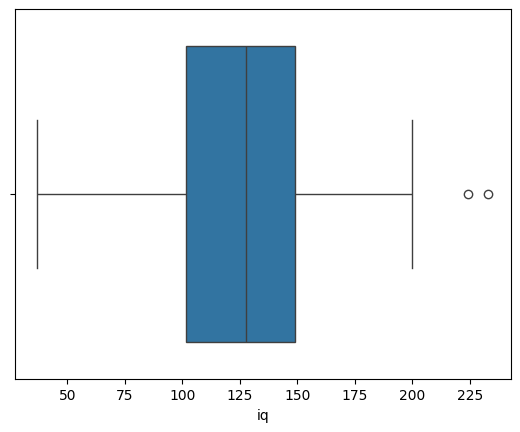

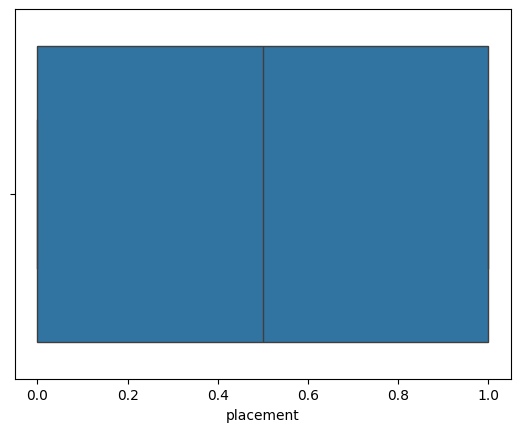

In [103]:
for i in data:
    sns.boxplot(x=i,data=data)
    plt.show()




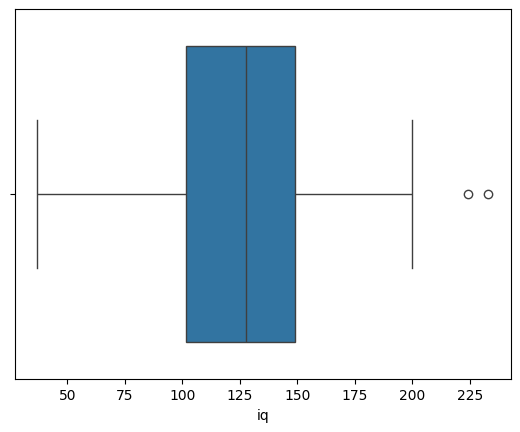

In [104]:
sns.boxplot(x="iq",data=data)
plt.show()

In [105]:
maxr=data['iq'].mean()+(3*data['iq'].std())
minr=data['iq'].mean()-(3*data['iq'].std())
data = data[(data['iq'] >= minr) & (data['iq'] < maxr)]


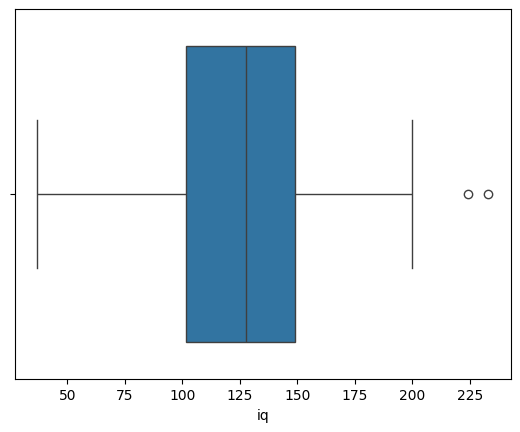

In [106]:
sns.boxplot(x="iq",data=data)
plt.show()

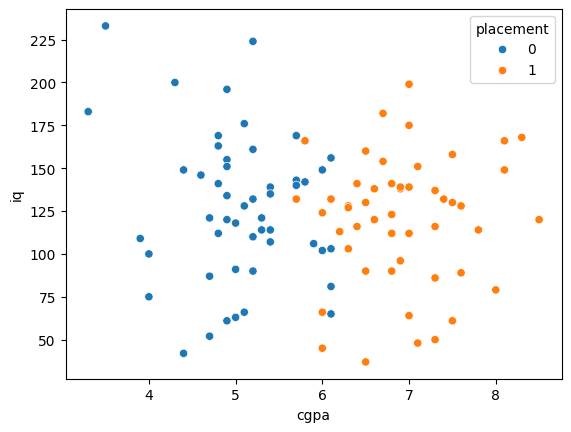

In [107]:
sns.scatterplot(x="cgpa",y="iq",data=data,hue="placement")
plt.show()

In [108]:
x=data.iloc[:,:-1]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [109]:
y=data['placement']

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [111]:
lr=LogisticRegression()

In [112]:
lr.fit(x_train,y_train)

LogisticRegression()

In [113]:
lr.score(x_test,y_test)*100

85.0

In [114]:
data

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [115]:
new_data = [[6.8,123]]
columns = ['cgpa', 'iq']
new_data_df = pd.DataFrame(new_data, columns=columns)
new_data_scaled = scaler.transform(new_data_df)

prediction = lr.predict(new_data_scaled)
prediction


if prediction==0:
    print("Predicted outcome", prediction,"not placed")
else:
    print("Predicted outcome", prediction,"Placed")



Predicted outcome [1] Placed


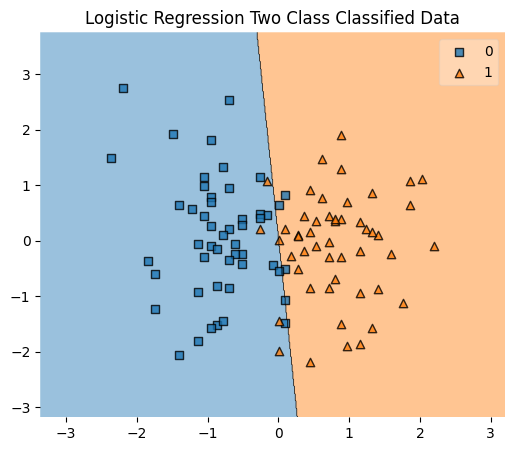

In [116]:

# Now plot the decision regions
plt.figure(figsize=(6, 5))
plot_decision_regions(x_scaled, y.to_numpy().astype(np.int_), clf=lr)
plt.title("Logistic Regression Two Class Classified Data")
plt.savefig("/Users/omgajipara/Desktop/Data Science/assets/LogisticRegressionTwoClassMultipleInput.jpg")
plt.show()


plt.savefig("/Users/omgajipara/Desktop/Data Science/AI:ML/Machine Learning/Supervised Learning/Classification/DecisionTree/images/DesicionTreeClassified.jpg")


In [117]:
import pickle

# Save the model
with open("/Users/omgajipara/Desktop/Data Science/TrainedModels/LogisticRegressionTwoClassMultipleInput/LogisticRegressionTwoClassMultipleInput_model.pkl", "wb") as f:
    pickle.dump(lr, f)

# Save the PolynomialFeatures transformer (not scaler)
with open("/Users/omgajipara/Desktop/Data Science/TrainedModels/LogisticRegressionTwoClassMultipleInput/LogisticRegressionTwoClassMultipleInput_scaler.pkl","wb") as f:
    pickle.dump(scaler, f)


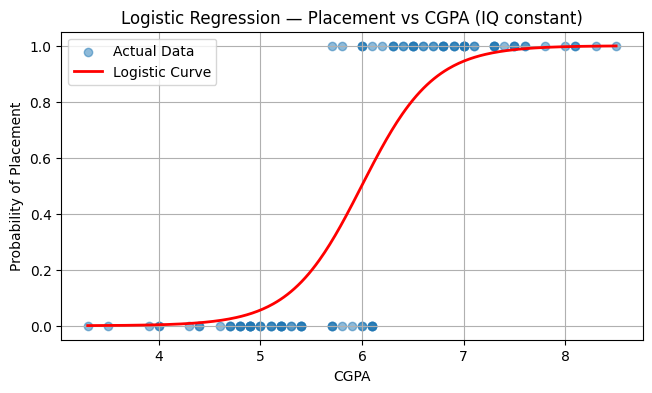

In [118]:
# Generate CGPA values
cgpa_range = np.linspace(data['cgpa'].min(), data['cgpa'].max(), 300)
iq_fixed = np.full_like(cgpa_range, fill_value=data['iq'].mean())  # IQ fixed

# Create DataFrame for prediction
curve_df = pd.DataFrame({
    "cgpa": cgpa_range,
    "iq": iq_fixed
})

# Scale the curve data
curve_scaled = scaler.transform(curve_df)

# Predict probabilities
y_prob = lr.predict_proba(curve_scaled)[:, 1]  # shape will be (300,)

# Plotting
plt.figure(figsize=(7.5, 4))
plt.scatter(data['cgpa'], data['placement'], label='Actual Data', alpha=0.5)
plt.plot(cgpa_range, y_prob, color='red', linewidth=2, label='Logistic Curve')
plt.xlabel("CGPA")
plt.ylabel("Probability of Placement")
plt.title("Logistic Regression — Placement vs CGPA (IQ constant)")
plt.legend()
plt.grid(True)
plt.savefig('assets/LogisticRegressionTwoClassMultipleCurve.jpg')
plt.show()




In [119]:
cf=confusion_matrix(y_test,lr.predict(x_test))
cf

array([[9, 1],
       [2, 8]])

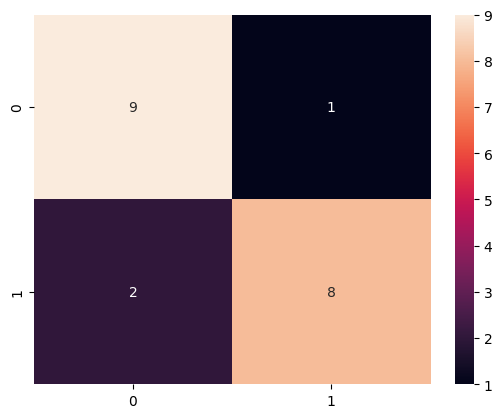

In [120]:
sns.heatmap(cf,annot=True)
plt.show()

In [121]:
pre=precision_score(y_test,lr.predict(x_test))
pre

0.8888888888888888

In [122]:
rec=recall_score(y_test,lr.predict(x_test))
rec

0.8